## Temperature Forecast Project using ML

#### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

##### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


#### Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [1]:
# Importing require library for performing EDA,

import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Temperature Forecast dataset 

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

In [4]:
# Data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Comment :

All variable are Numerical in nature.

Next_Tmax and Next_Tmin are Target Variable.

This dataset contain 7752 Rows and 25 Columns.

#### Exploratory Data Analysis(EDA)

In [5]:
# This will check if any duplicate entry or duplicate row with same value exist

df.duplicated().sum()

0

In [6]:
# Let check if any whitespace, 'NA' or '-' exist in dataset.

df.isin([' ','NA','-']).sum().any()

False

Comment:

No Duplicate entry in dataset.

No whitespace, NA, '-' exist in dataset.

##### Missing value check

In [7]:
# Finding what percentage of data is missing from the dataset

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

As missing values present are less than 1%. 

Every columns has missing values min missing values count are and max 75. looking at the stats we will fill them

In [8]:
# Statistical summary of numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


Comment:

It has been observed that some column has high spread and some of the columns's std is close to mean like present_Tmax has low standard deviation and some of the columns have high spread like LDAPS_LH.

we have seen couple of columns have 0 min value, median and 25th Percentile

i have notice that ION is quasi constant columns, will check more and drop if they will be found constant

We have missing value in target columns also, we wil impute them wiht mean as max values comes under 3rd standard deviation hence for extreme values

##### Filling Missing value

In [9]:
# we will fill station and date with mode as station is a categorical type and date is datetime and rest all will be filled with mean

df["station"] =  df["station"].fillna(df["station"].mode()[0])
df["Date"] = df["Date"].fillna(df["Date"].mode()[0])

# filling other columns

for i in df.iloc[:,2::].columns:
    df[i] = df[i].fillna(df[i].mean())

In [12]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.213213,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### Exploring Present Temperature

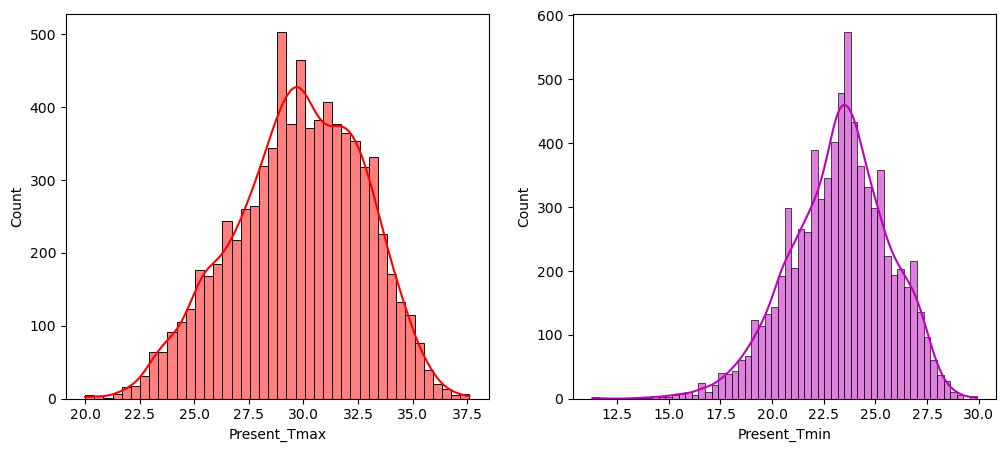

In [13]:
# Plotting histogram for present_Tmax and present_Tmin variables

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

Comment:

For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.

For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

In [14]:
# Converting Date datatypes and spliting date into date, month and year.

df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [15]:
# Lets find out maximum and minimum Temperature over period

print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.768211403280397
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.225058578495183


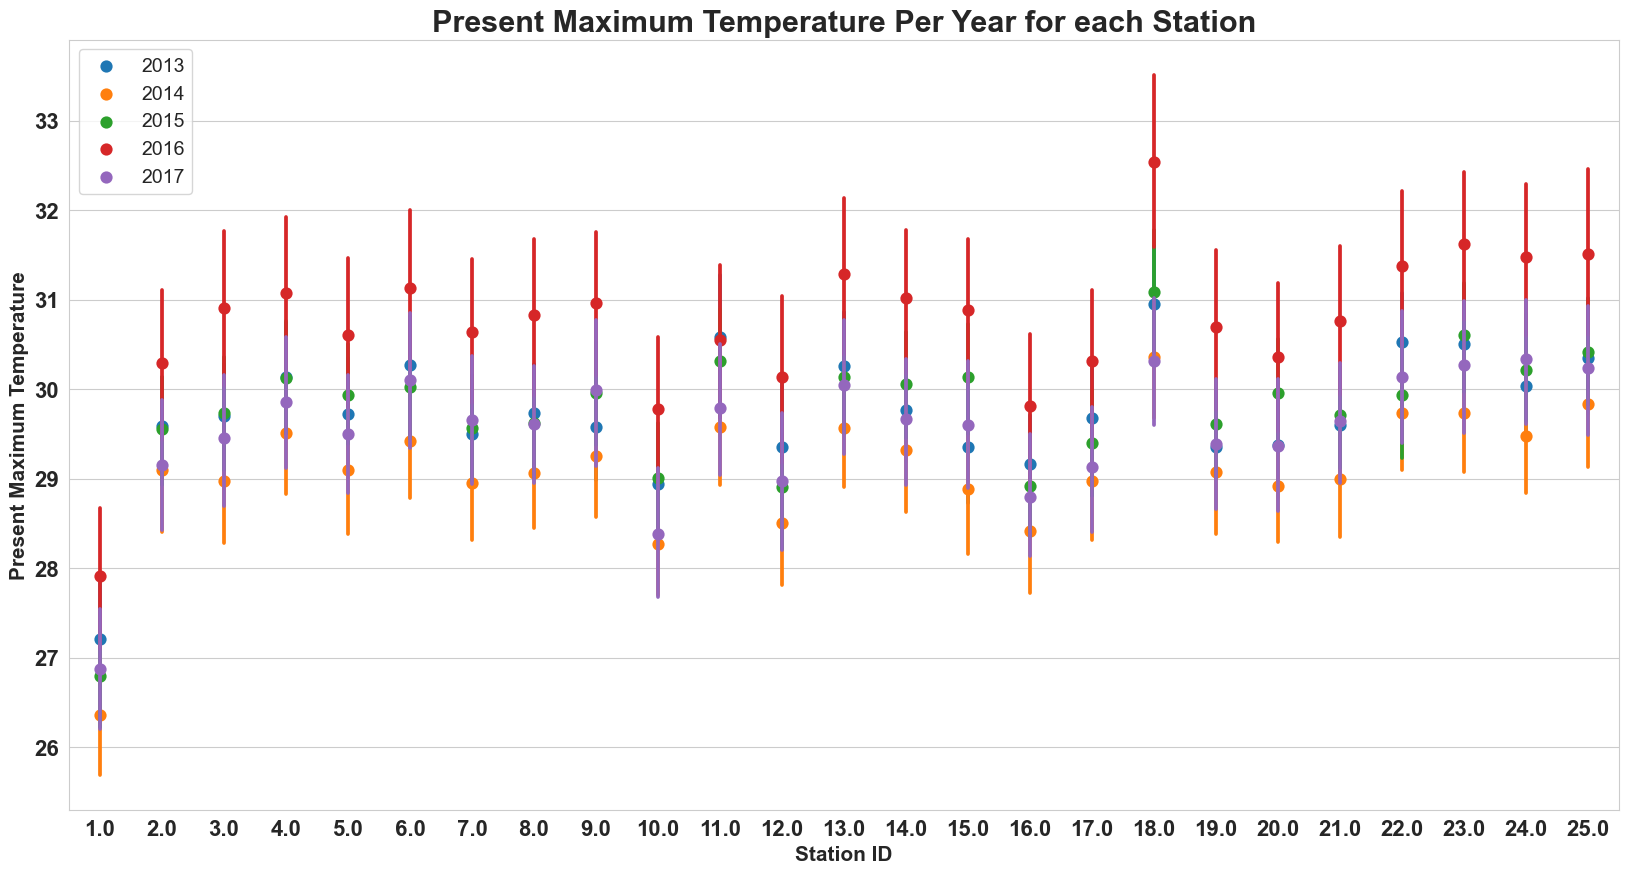

In [16]:
# Present Temperature Maximum over each Station

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Observation on line plot of Present Maximum Temperature:

Over all four year higher temperature recorded at station 18 in compare to rest.

Station 1 is coolest station over all timeframe.

We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.

Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017 !!!

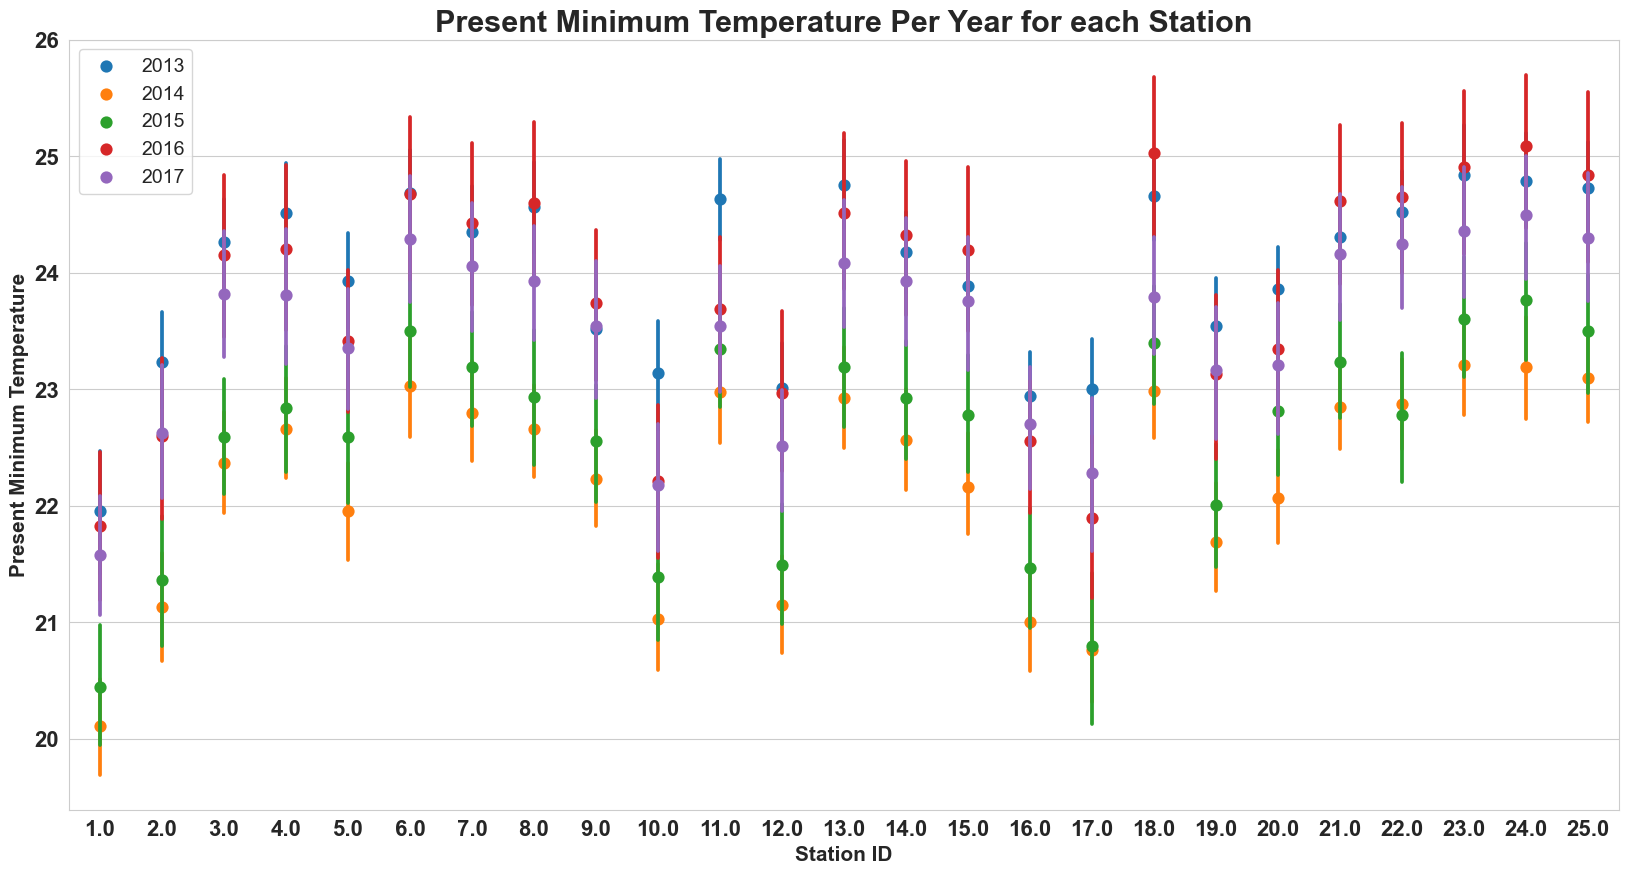

In [17]:
# Present Temperature Minimum over each Station

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Observation on line plot of Present Minimum Temperature:

Year 2014 is coolest year of all time frame.

Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.

Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

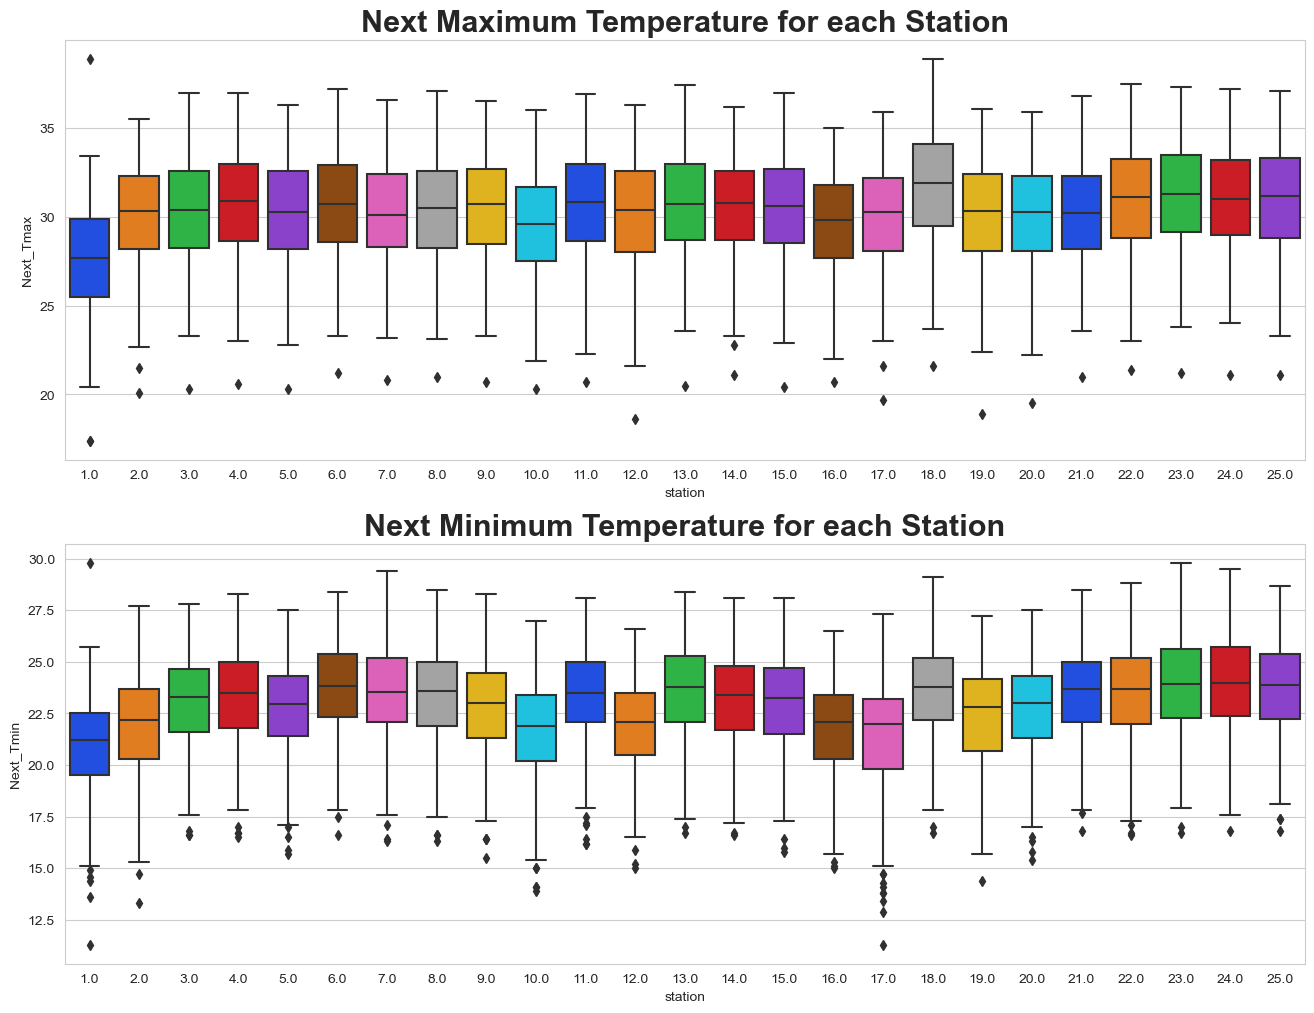

In [18]:
# Visualizing the realtion between station and target variables

plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x=df['station'],y=df['Next_Tmax'],data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x=df['station'],y=df['Next_Tmin'],data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

Observation :

From the box plot

we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.

Maximum temperature difference at same station occur in station 17.

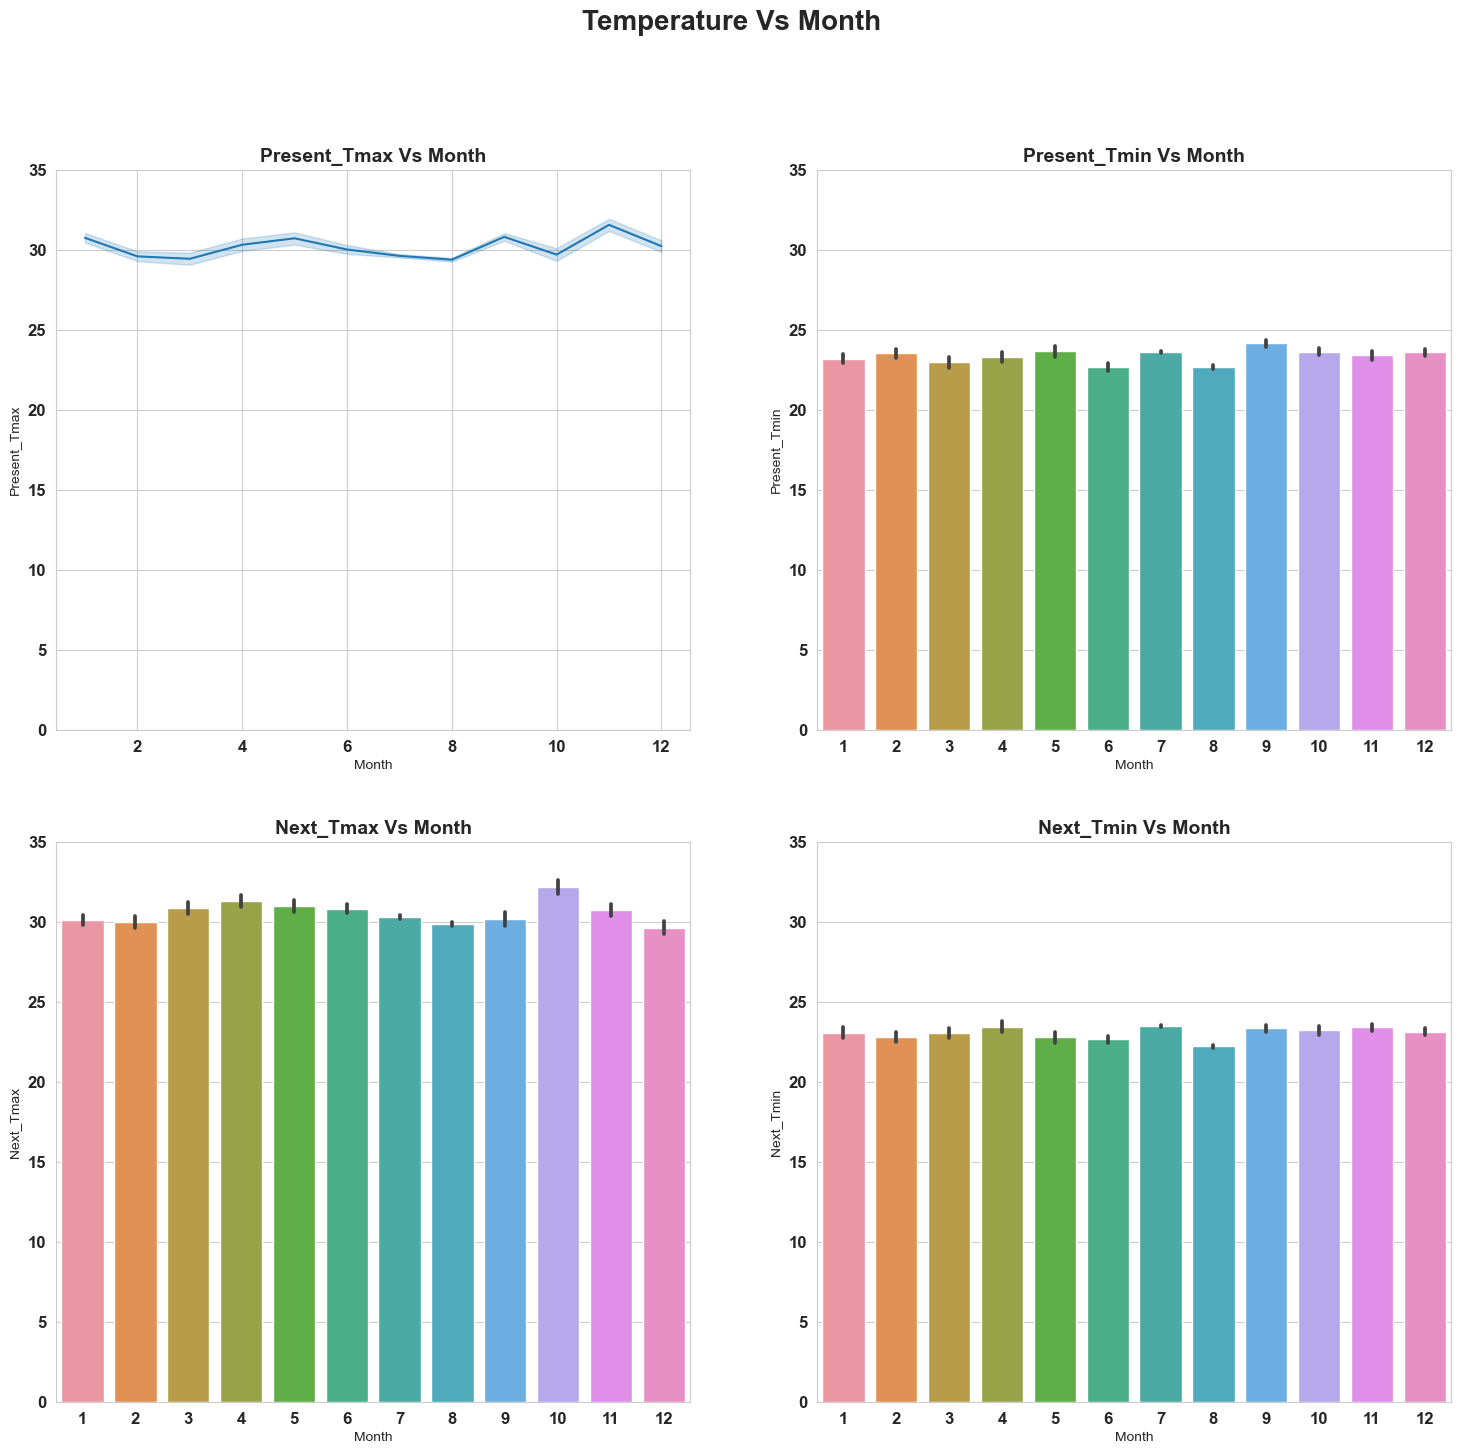

In [19]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5341.502802661377


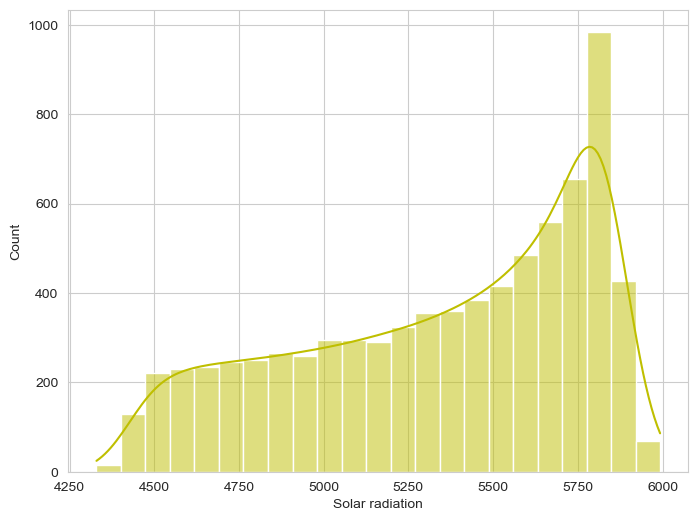

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

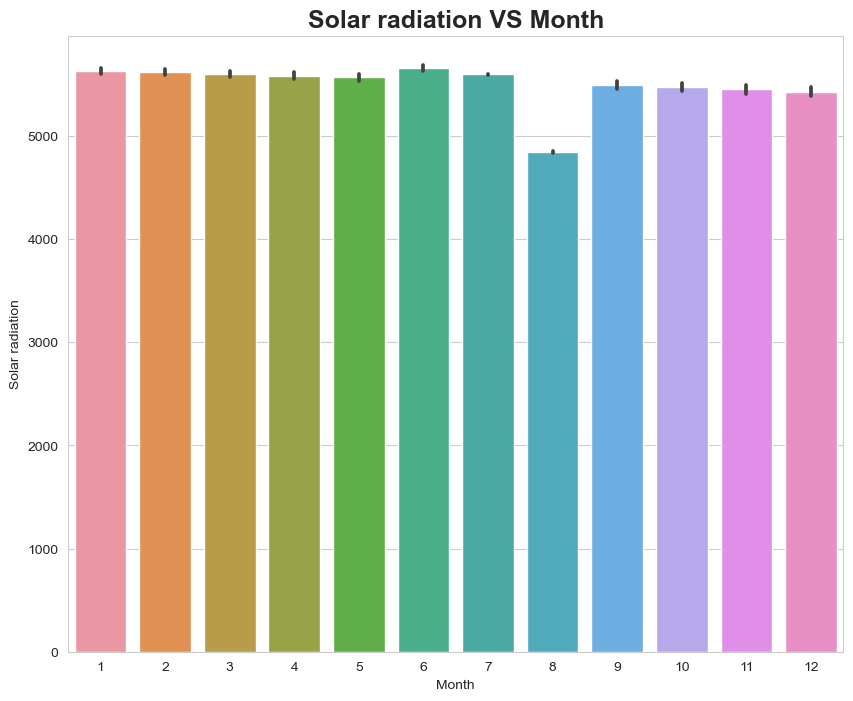

In [21]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

Comment :

Solar Radiation data is left skewed.

It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.

For most of reading solar radiation values lies in the range 5600 to 5850.

Minimum solar radiation occur in month of 8.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.097874569625374 m/s


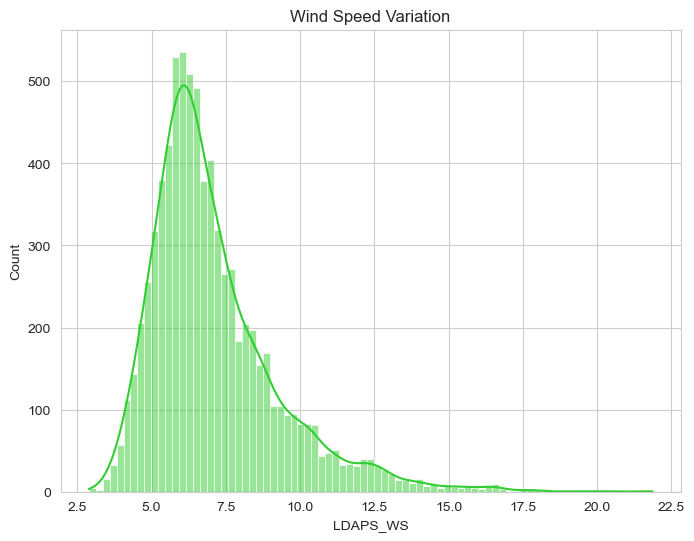

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

#### Encoding categorical data

In [23]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

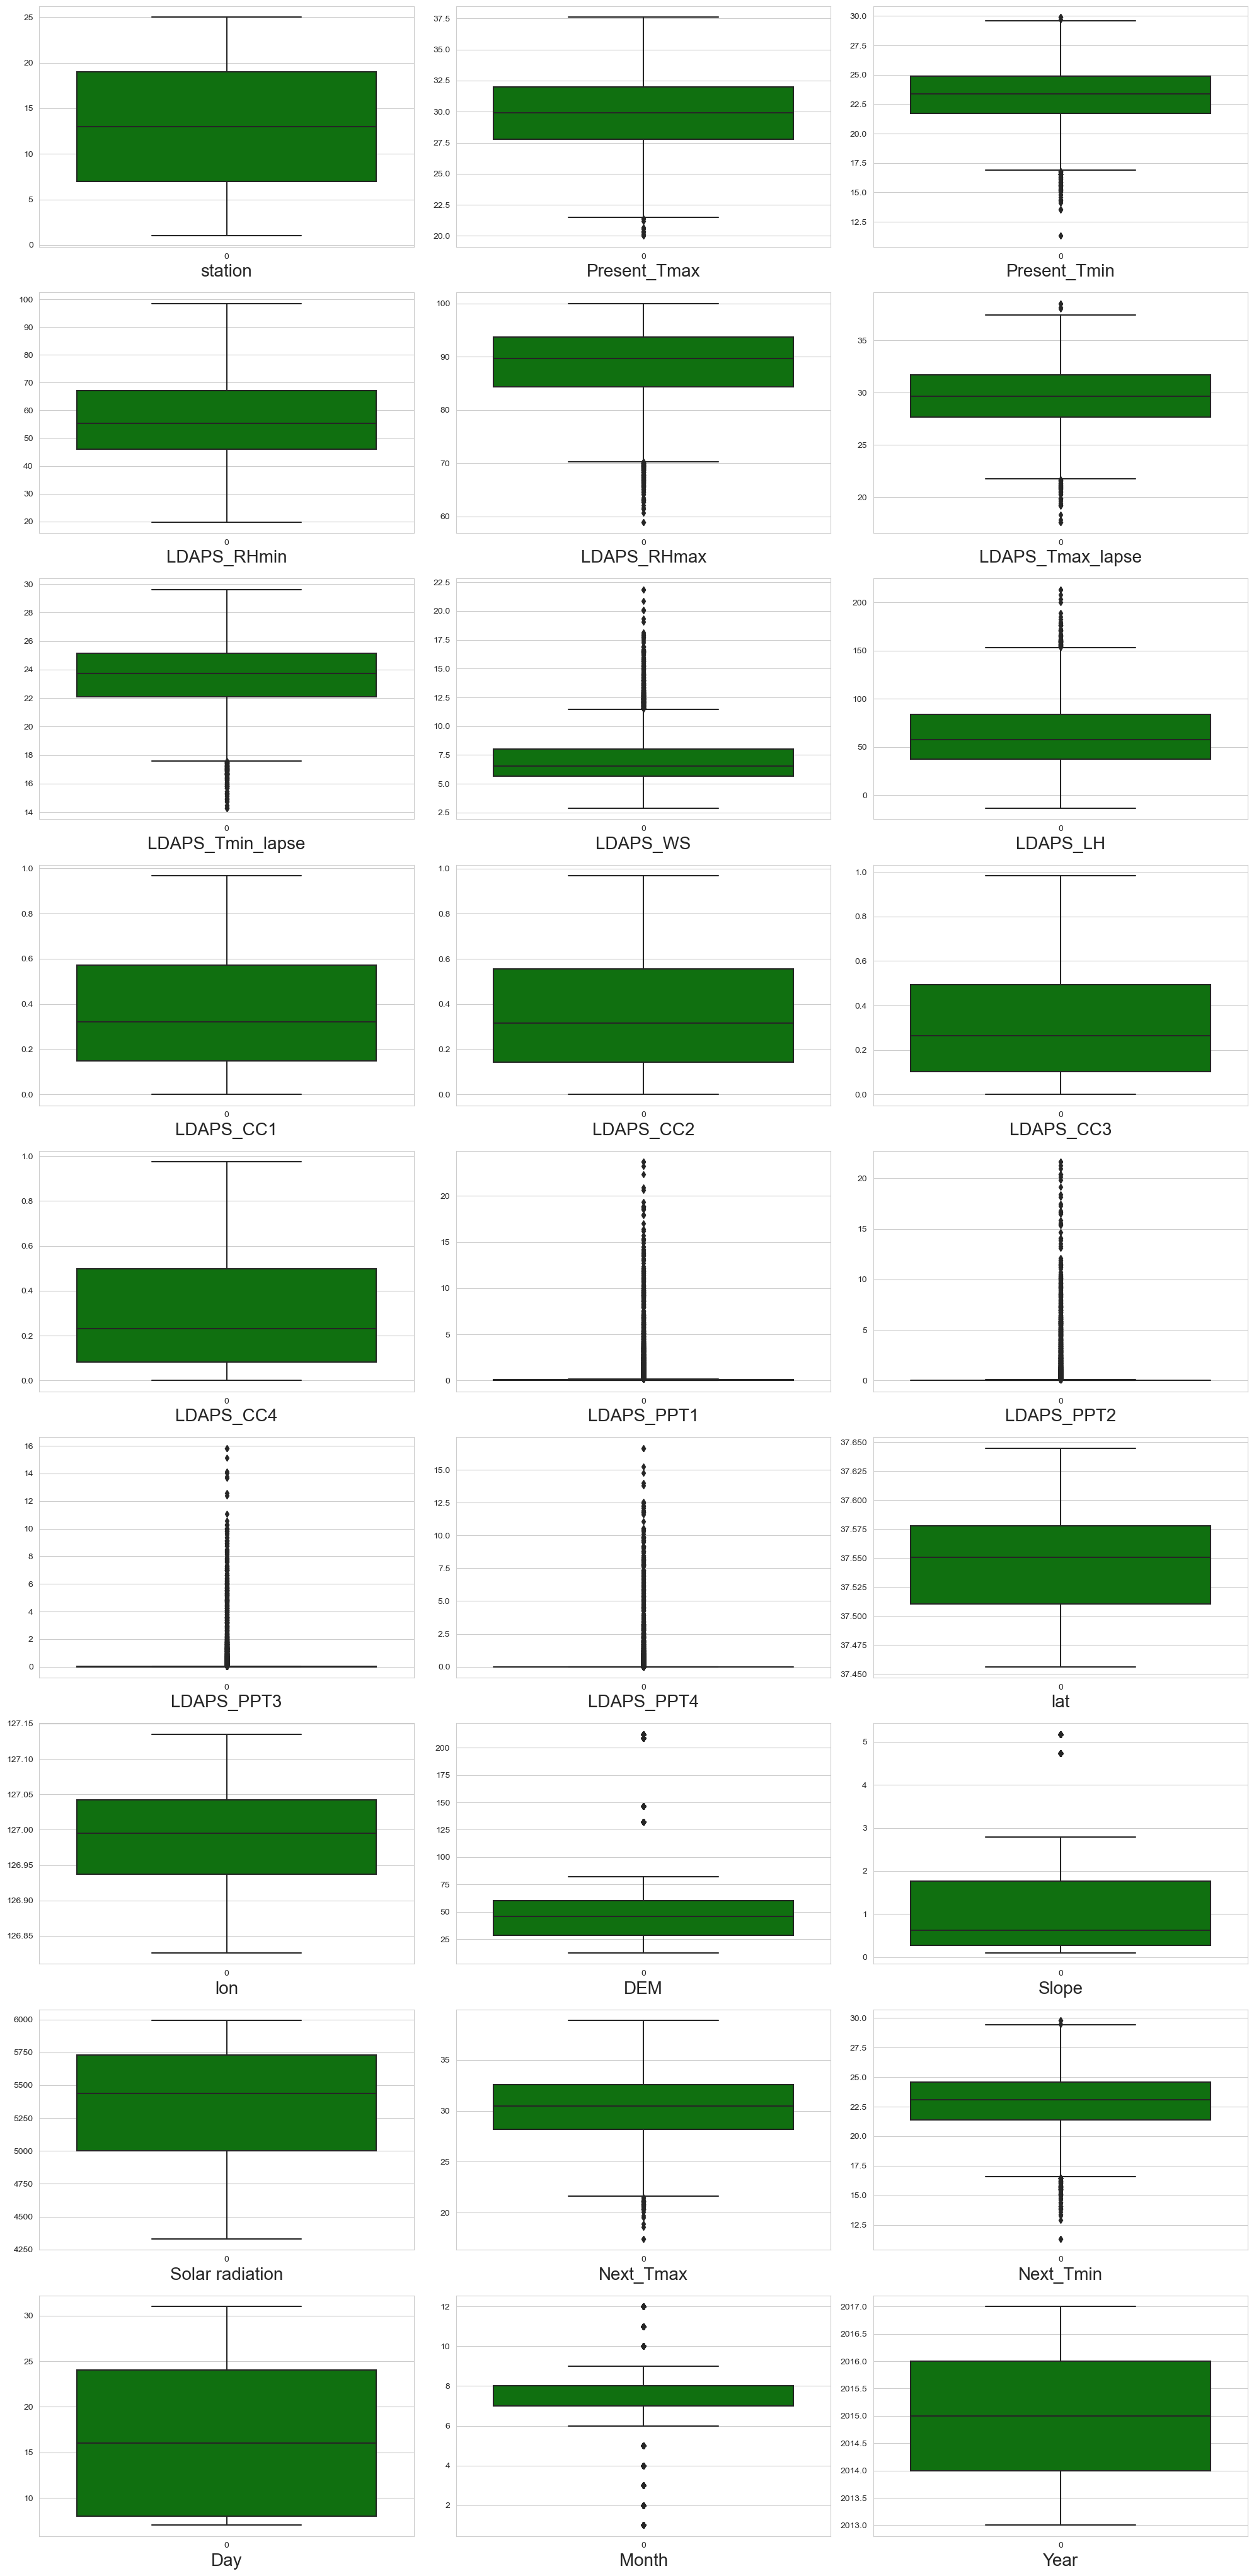

In [24]:
# Outliers Detection and Removal

plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [25]:
# Outliers removal using Zscore method

from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7752, 27)
Shape of the dataframe after removing outliers:  (6894, 27)
Percentage of data loss post outlier removal:  11.06811145510836


We are losing 11.06 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building.

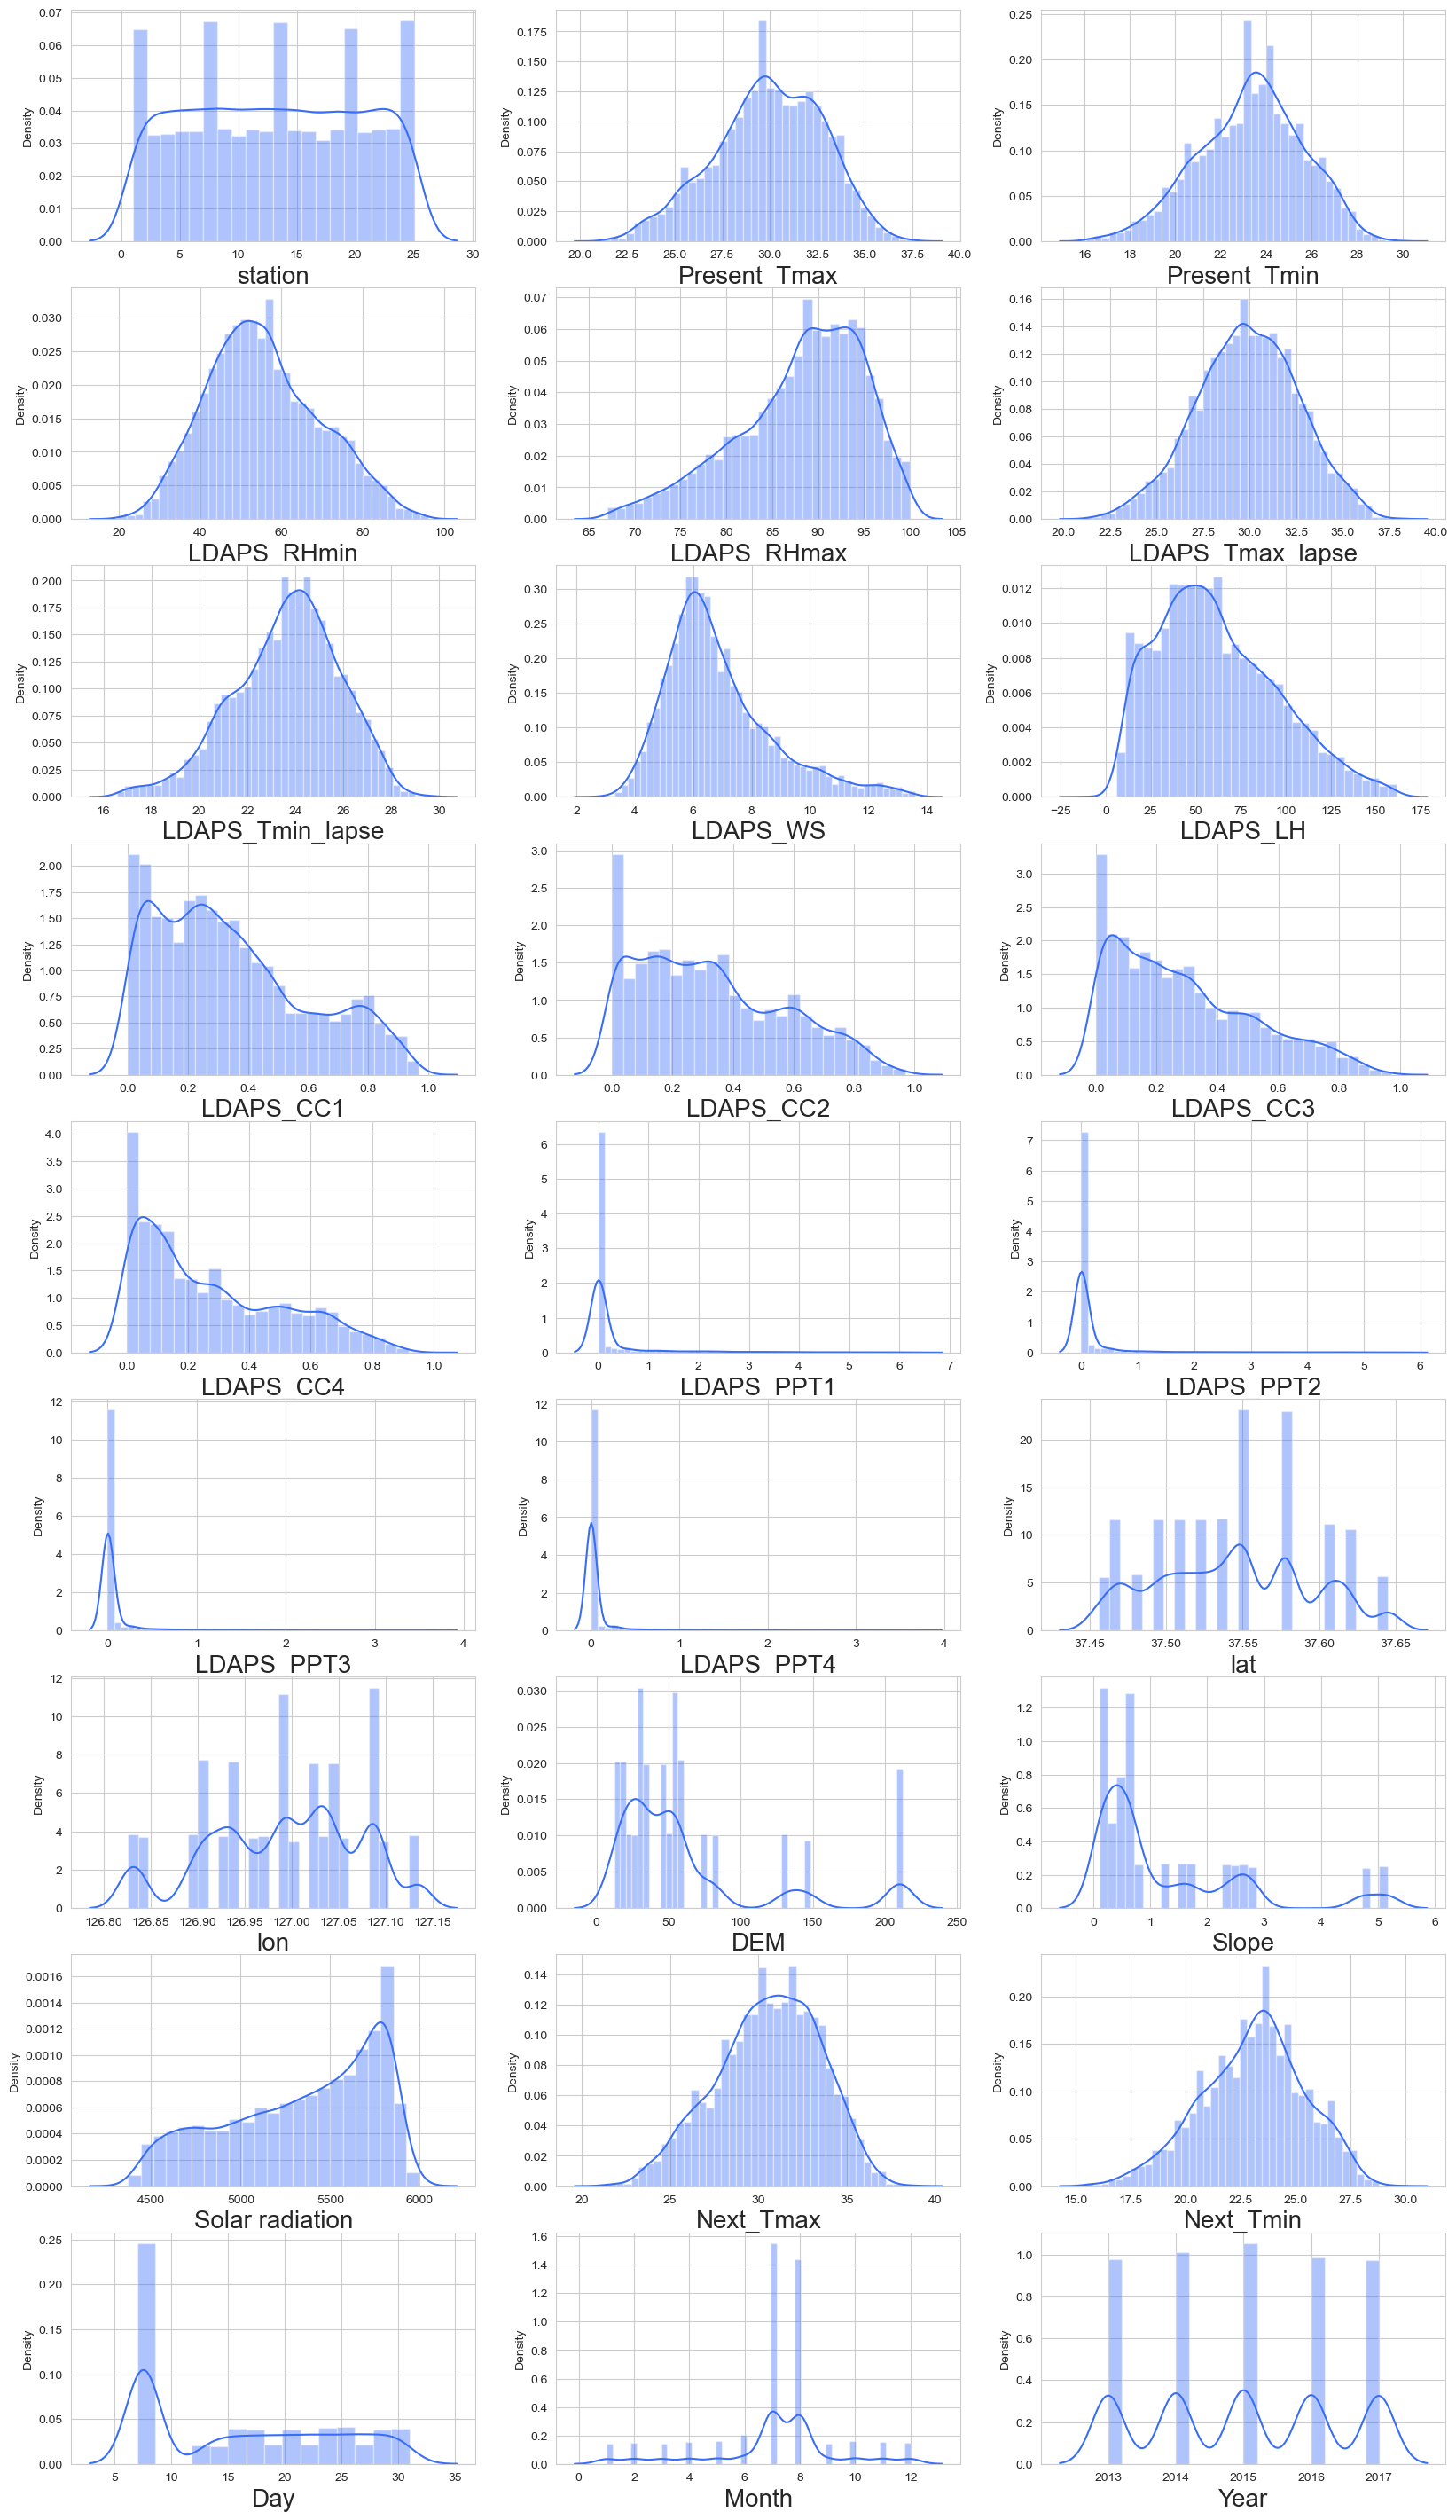

In [26]:
# Skewness of features

plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

In [27]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [28]:
# Corrleation

df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.109476,0.132092,-0.067901,-0.178969,0.065989,0.107906,0.028789,-0.135982,0.009486,...,-0.240428,-0.122474,-0.324770,-0.144452,-0.031514,0.106116,0.129180,0.006243,0.001826,0.005841
Present_Tmax,0.109476,1.000000,0.612869,-0.151799,-0.318124,0.534696,0.615649,-0.069755,0.119137,-0.286673,...,-0.050398,0.011214,-0.130940,-0.092664,-0.103106,0.586403,0.616843,-0.126611,0.040312,0.103304
Present_Tmin,0.132092,0.612869,1.000000,0.150633,-0.053982,0.434144,0.751668,0.037901,-0.006328,0.090553,...,-0.071014,-0.043494,-0.237731,-0.157512,-0.053333,0.446660,0.785261,-0.070130,-0.011823,0.097860
LDAPS_RHmin,-0.067901,-0.151799,0.150633,1.000000,0.565727,-0.555284,0.115993,0.176955,-0.005211,0.575977,...,0.088642,-0.094266,0.057383,0.084822,0.229509,-0.428028,0.133571,-0.071543,-0.069300,0.000863
LDAPS_RHmax,-0.178969,-0.318124,-0.053982,0.565727,1.000000,-0.404234,-0.179933,0.064475,0.282047,0.427557,...,0.230665,0.011505,0.173592,0.209613,0.156190,-0.323628,-0.110923,-0.009467,-0.049926,-0.145651
LDAPS_Tmax_lapse,0.065989,0.534696,0.434144,-0.555284,-0.404234,1.000000,0.623580,-0.157989,0.007198,-0.417050,...,-0.036545,0.103314,-0.111669,-0.107119,-0.033393,0.805676,0.547000,-0.141136,-0.014464,0.062128
LDAPS_Tmin_lapse,0.107906,0.615649,0.751668,0.115993,-0.179933,0.623580,1.000000,-0.003295,-0.141734,0.023756,...,-0.089850,-0.029852,-0.176113,-0.160993,0.014294,0.542115,0.864732,-0.144534,-0.019383,0.055666
LDAPS_WS,0.028789,-0.069755,0.037901,0.176955,0.064475,-0.157989,-0.003295,1.000000,-0.056419,0.208415,...,-0.026670,-0.076175,0.114294,0.096184,0.161606,-0.202083,0.025794,-0.048401,-0.062641,-0.117238
LDAPS_LH,-0.135982,0.119137,-0.006328,-0.005211,0.282047,0.007198,-0.141734,-0.056419,1.000000,-0.113785,...,0.098781,0.010221,0.049341,0.065981,-0.038476,0.151073,-0.049966,-0.015228,-0.014119,0.055638
LDAPS_CC1,0.009486,-0.286673,0.090553,0.575977,0.427557,-0.417050,0.023756,0.208415,-0.113785,1.000000,...,-0.006864,-0.013743,-0.027038,-0.028714,0.233889,-0.447965,0.009312,-0.033588,-0.103823,-0.070364


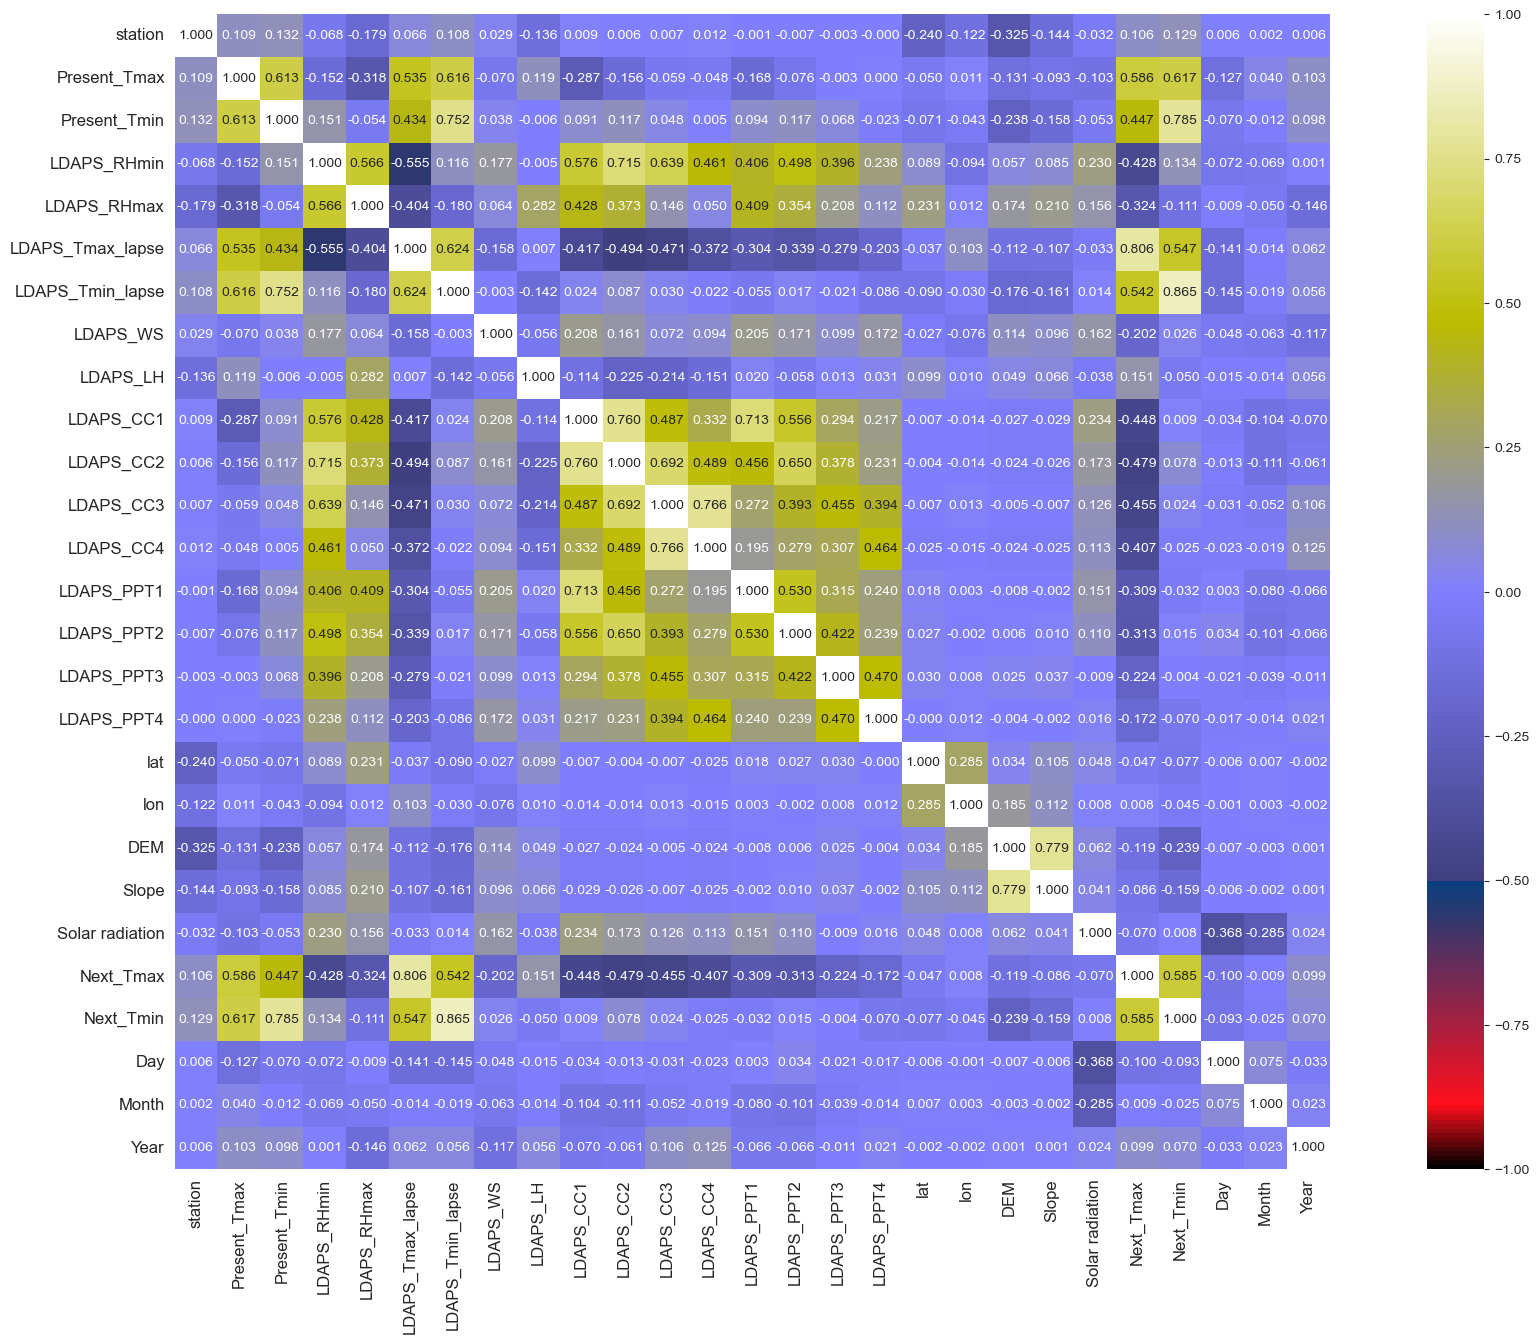

In [29]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

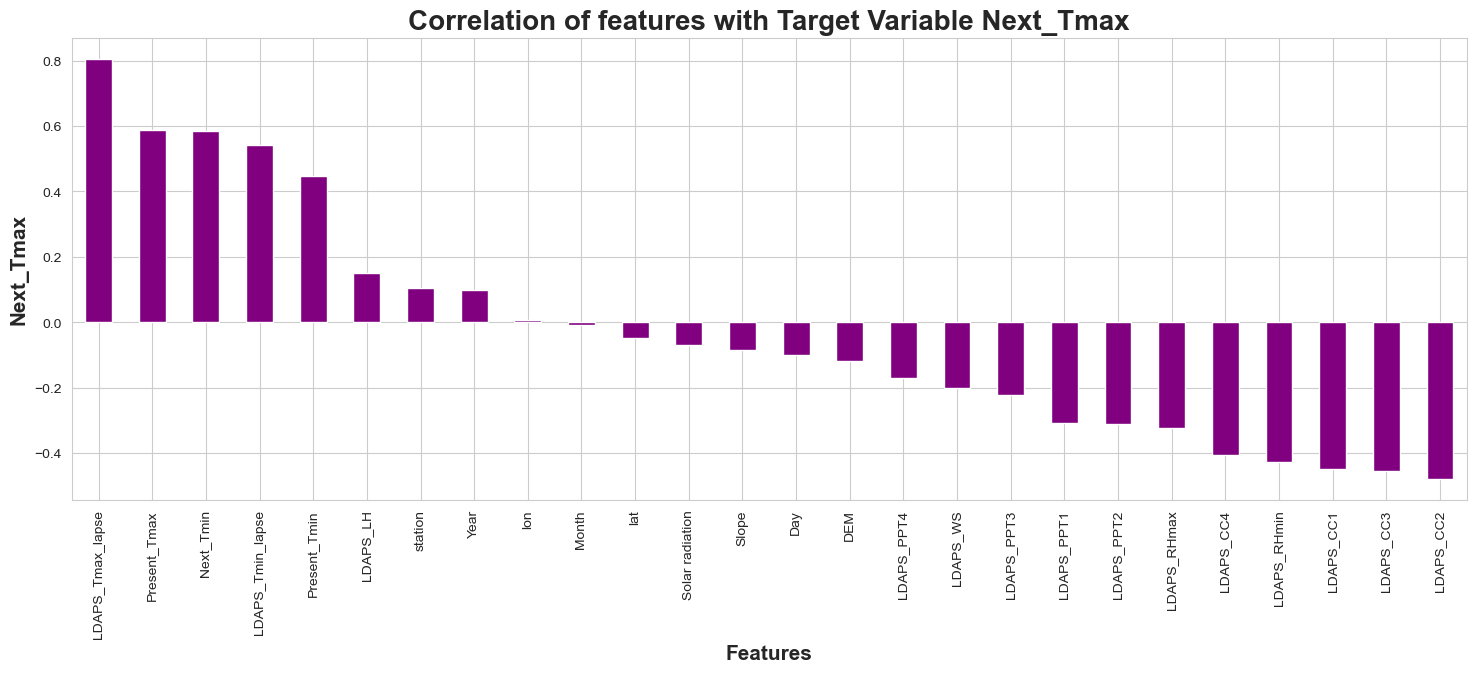

In [30]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

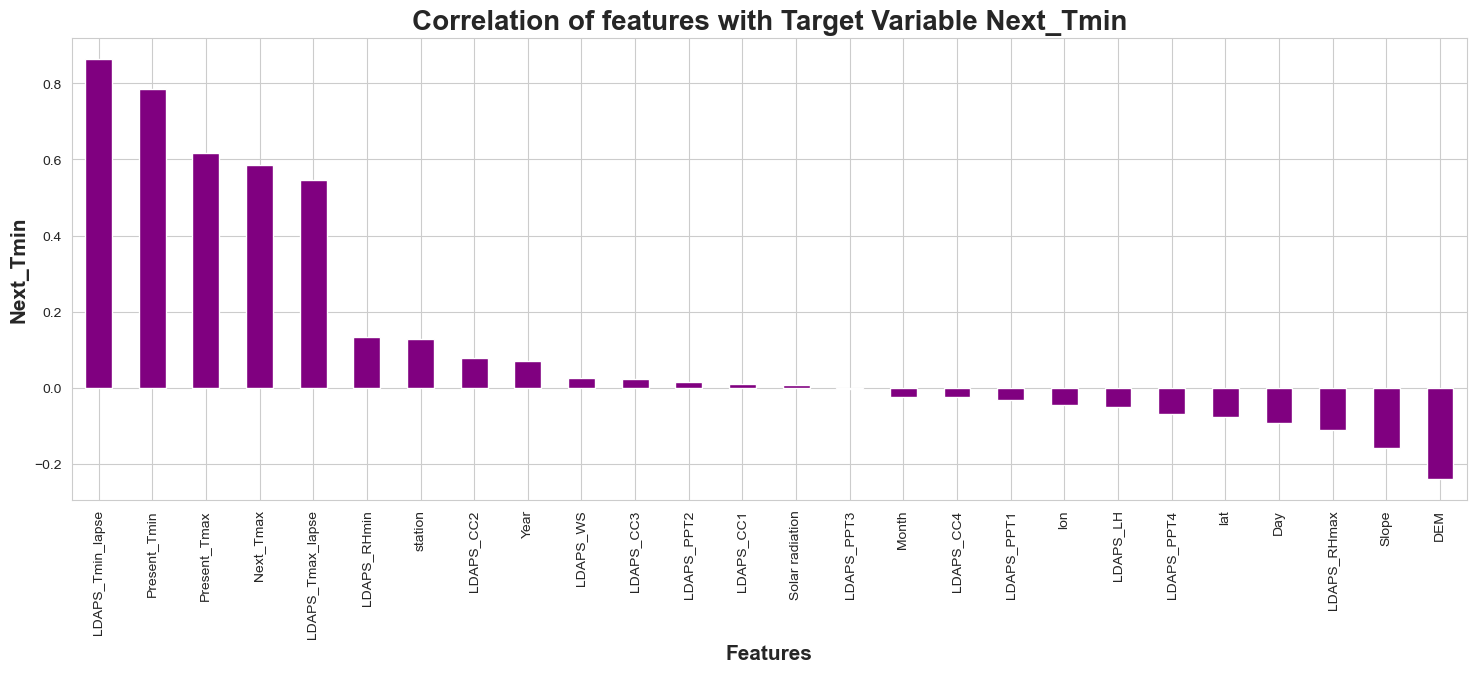

In [31]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

#### Machine Learning Model Building

In [32]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

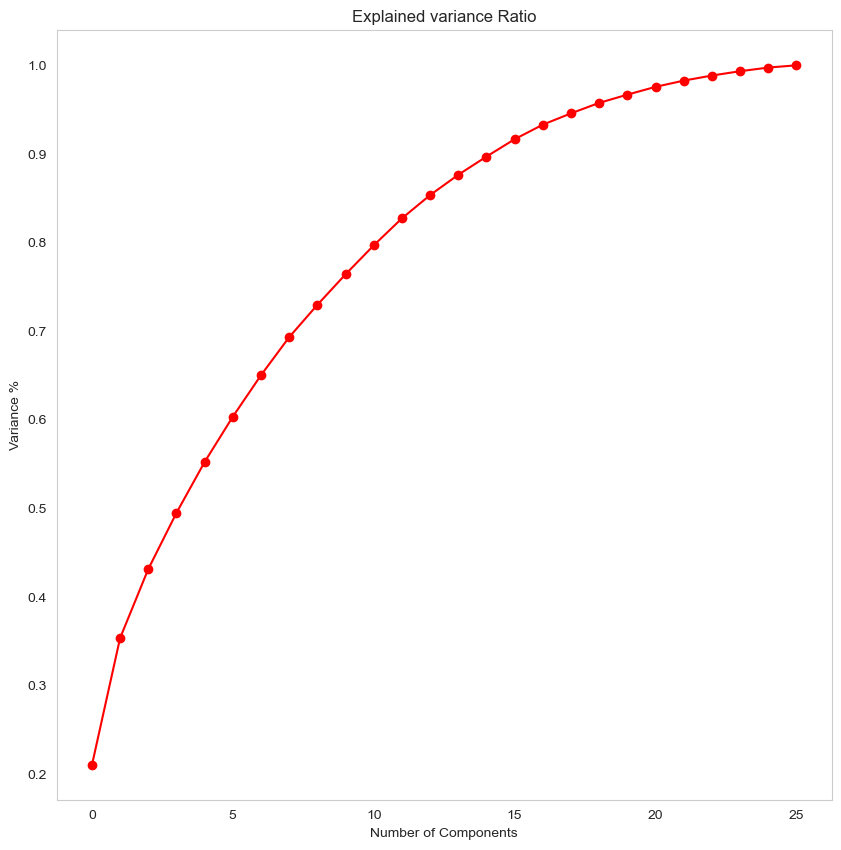

In [34]:
### PCA

from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
"""Dropping the these columns, Day, month and year are kept for analysis purpose and 
LDAPS columns are correlated with other columns"""

df.drop(columns = ["station","LDAPS_CC2","LDAPS_CC3"], axis = 1, inplace = True)

In [37]:
# Seprating data into X and Y, since it has two target variance thus kept y1 an y2
X_new = df.drop(columns =["Next_Tmin","Next_Tmax"], axis=1)
y1_new = df["Next_Tmin"]
y2_new = df["Next_Tmax"]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X_new)

In [38]:
# Next_tmin prediction

for i in range(40,300,60):
    X_train1,X_test1,y1_train,y1_test = train_test_split(X_new,y1_new, test_size =0.2, random_state = i)
    LR1_new = LinearRegression()
    LR1_new.fit(X_train1,y1_train)
    pred= LR1_new.predict(X_test1)
    print("r2score",r2_score(y1_test, pred),"Random",i)
    print("mean_squared_error",mean_squared_error(y1_test, pred),"\n")

r2score 0.8079481449416348 Random 40
mean_squared_error 1.093674132355566 

r2score 0.8004910493477391 Random 100
mean_squared_error 1.0832698562163037 

r2score 0.8077387785572867 Random 160
mean_squared_error 1.0714848345937067 

r2score 0.8173117487813202 Random 220
mean_squared_error 1.0342167997361207 

r2score 0.8038208462988721 Random 280
mean_squared_error 1.103791026070425 



In [39]:
# Next_tmax prediction

for i in range(40,300,60):
    X_train2,X_test2,y2_train,y2_test = train_test_split(X_new,y2_new, test_size =0.2, random_state = i)
    LR2_new = LinearRegression()
    LR2_new.fit(X_train2,y2_train)
    pred= LR2_new.predict(X_test2)
    print("r2score",r2_score(y2_test, pred),"Random",i)
    print("mean_squared_error",mean_squared_error(y2_test, pred),"\n")

r2score 0.7456537306481346 Random 40
mean_squared_error 2.2067317717592956 

r2score 0.7259738598967344 Random 100
mean_squared_error 2.3412330762026192 

r2score 0.7402654238807811 Random 160
mean_squared_error 2.3399525975206203 

r2score 0.739233464435026 Random 220
mean_squared_error 2.22414916469457 

r2score 0.7487609767613523 Random 280
mean_squared_error 2.179166390103241 



In [40]:
Model1 =  [Lasso() , Ridge(),RandomForestRegressor(),GradientBoostingRegressor(), 
           KNeighborsRegressor(),DecisionTreeRegressor()]
           
Model2  = [Lasso() , Ridge(),RandomForestRegressor(),GradientBoostingRegressor(), 
           KNeighborsRegressor(),DecisionTreeRegressor()]

In [41]:
# Next_Tmin Prediction

for i in Model1:
    X_train1,X_test1,y1_train,y1_test = train_test_split(X_new,y1_new, test_size =0.2, random_state = 220)
    i.fit(X_train1,y1_train)
    pred= i.predict(X_test1)
    print("r2score",r2_score(y1_test, pred),i)
    print("mean_squared_error",mean_squared_error(y1_test, pred),"\n")

r2score 0.6902294811814778 Lasso()
mean_squared_error 1.753642461887731 

r2score 0.81721797810944 Ridge()
mean_squared_error 1.034747645061609 

r2score 0.90271803871953 RandomForestRegressor()
mean_squared_error 0.5507230924615337 

r2score 0.8817760456137116 GradientBoostingRegressor()
mean_squared_error 0.6692778486952553 

r2score 0.8574658713662262 KNeighborsRegressor()
mean_squared_error 0.8069002214726189 

r2score 0.7594018164148483 DecisionTreeRegressor()
mean_squared_error 1.3620508258733413 



In [42]:
# Next_Tmax Prediction

for i in Model2:
    X_train2,X_test2,y2_train,y2_test = train_test_split(X_new,y2_new, test_size =0.2, random_state = 280)
    i.fit(X_train2,y2_train)
    pred= i.predict(X_test2)
    
    print('r2score',r2_score(y2_test, pred),i)
    print("mean_squared_error",mean_squared_error(y2_test, pred),"\n")

r2score 0.6725402136459189 Lasso()
mean_squared_error 2.8402807467348543 

r2score 0.7488549844588814 Ridge()
mean_squared_error 2.1783509976047917 

r2score 0.8910906656248787 RandomForestRegressor()
mean_squared_error 0.9446444982129341 

r2score 0.8443144133011724 GradientBoostingRegressor()
mean_squared_error 1.350366649194172 

r2score 0.8736662278744682 KNeighborsRegressor()
mean_squared_error 1.0957784606948404 

r2score 0.7247684298807487 DecisionTreeRegressor()
mean_squared_error 2.3872700162884306 



Randomforest is working good as compared to other models, we will selected Randomforest as final one and train further

####  Cross Validation

In [44]:

for m in Model1:
    score = cross_val_score(m, X_scale, y1_new, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : Lasso() :

Mean CV Score : 0.5125115988232161


Cross Validation Score : Ridge() :

Mean CV Score : 0.7477864182419165


Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7604661583655257


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7786225704482342


Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : 0.5263045868783713


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5362890142182739


In [45]:
for m in Model2:
    score = cross_val_score(m, X_scale, y2_new, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : Lasso() :

Mean CV Score : 0.4752020876913473


Cross Validation Score : Ridge() :

Mean CV Score : 0.6326759433193796


Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.656081465136797


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.6815197142915569


Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : 0.461929252273478


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.35551101684441555


#### Hyper Parameter Tuning : GridSearchCV

In [48]:
# Next_tmin prediction
RF_y1 = RandomForestRegressor()

para_y1 = {"n_estimators" :[100,150,200,250,300],
          "max_depth" : [2,3,4,5,6,7],
          "min_samples_split" :[2,3,4,5]}

grid_search = GridSearchCV(RF_y1,para_y1, scoring = "r2", cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train1,y1_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 200}


In [49]:
# Next_tmix prediction

RF_y2 = RandomForestRegressor()

para_y2 = {"n_estimators" :[100.200,250,300],
          "max_depth" : [2,3,4,5,6,7],
          "min_samples_split" :[2,3,4,5]}

grid_search2 = GridSearchCV(RF_y2,para_y2, scoring = "r2", cv = 5, n_jobs = -1, verbose = 2)
grid_search2.fit(X_train2,y2_train)
print(grid_search2.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 300}


#### Final Regression Model

In [51]:
from xgboost import XGBRegressor

# Final Model Next_tmin

Final_mod1 =  XGBRegressor(n_estimators=200 ,max_depth = 7 )
Final_mod1.fit(X_train1,y1_train)
y_pred=Final_mod1.predict(X_test1)
print('\n')                                        
print('\033[1m'+' Error in Final Model1 Next_tmin :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y1_test,pred))
print('Mean squared error :', mean_squared_error(y1_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y1_test,pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model1 Next_tmin :'+'\033[0m')
print(r2_score(y1_test,pred)) 
print('\n')



 Error in Final Model1 Next_tmin :
Mean absolute error : 7.525680444766739
Mean squared error : 69.77641168218996
Root Mean Squared Error: 8.353227620638023


 R2 Score of Final Model1 Next_tmin :
-11.325588435409683




In [52]:
# Final Model Next_tmix

Final_mod2 =  XGBRegressor(n_estimators=300 ,max_depth = 7 )
Final_mod2.fit(X_train2,y2_train)
y_pred=Final_mod2.predict(X_test2)
print('\n')                                        
print('\033[1m'+' Error in Final Model2  Next_tmix :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y2_test,pred))
print('Mean squared error :', mean_squared_error(y2_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test,pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model2  Next_tmix :'+'\033[0m')
print(r2_score(y2_test,pred)) 
print('\n')



 Error in Final Model2  Next_tmix :
Mean absolute error : 1.1015768191856112
Mean squared error : 2.3872700162884306
Root Mean Squared Error: 1.545079291262565


 R2 Score of Final Model2  Next_tmix :
0.7247684298807487




Conclusion:

We have all numeric data set and basis on that we have to predict Next_Tmin and Tmax temperature.Have checked missing values and found that all the columns had missing values, it was imputed with mean, even target columns had missing value and imputed with team.i have observed that couple of featureshad outliers whcih corrected with Mean and Std method. i have checked the variance as well of all the columns to check whether are they constant or quasi constant, i found two features which has variance less than 0.01 so deleted them.we checked the correlation of all the columns except date and station, a few of features were correlated we deleted them and trained Model with many models.

Randomforestregressor is working well out of all other models. it has given 90% r2_score with. I have done further with  cross_val_score and procesing with Gridsearch CV and saved the model.

In [54]:
# Saving Final Model

import joblib
joblib.dump(Final_mod1,'Next_Tmin_Forecast_Final1.pkl')

joblib.dump(Final_mod2,'Next_Tmix_Forecast_Final2.pkl')

['Next_Tmix_Forecast_Final2.pkl']